In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
df.shape

(205, 26)

In [ ]:
df.drop(columns=['car_ID','CarName','curbweight'], inplace=True)
df.shape

(205, 23)

In [ ]:
df.drop(columns=['symboling','fueltype','doornumber','aspiration','drivewheel','enginelocation',
                   'carbody','cylindernumber','fuelsystem','enginetype'], inplace=True)
df.shape,df.columns

((205, 13),
 Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'enginesize',
        'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
        'citympg', 'highwaympg', 'price'],
       dtype='object'))

In [ ]:
from sklearn import preprocessing as pre
lab=pre.LabelEncoder()
cat=df.select_dtypes("object").columns.to_list()
cat

[]

In [ ]:
for feature in cat:
    df[feature]=lab.fit_transform(df[feature])

df.select_dtypes("object").head(2)

""
0
1


<Axes: >

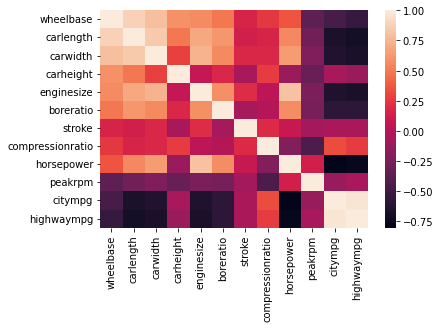

In [ ]:
sns.heatmap(df.drop(columns=['price']).corr())

In [ ]:
df.drop(columns=['highwaympg','carwidth','carlength','horsepower'], inplace=True)


In [ ]:
df.drop(columns=['wheelbase','boreratio'], inplace=True)

In [ ]:
y=df.price
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [ ]:
x=df.drop(columns=['price'])
x.head()

,carheight,enginesize,stroke,compressionratio,peakrpm,citympg
0,48.8,130,2.68,9.0,5000,21
1,48.8,130,2.68,9.0,5000,21
2,52.4,152,3.47,9.0,5000,19
3,54.3,109,3.40,10.0,5500,24
4,54.3,136,3.40,8.0,5500,18


In [ ]:
from sklearn.model_selection import train_test_split as split

x_train,x_test,y_train,y_test=split(x,y,test_size=0.2, random_state=100)

In [ ]:
from sklearn import linear_model as lr
reg=lr.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
print("Accuracy=",reg.score(x_test,y_test)*100,"%")

Accuracy= 87.15820234951622 %
